In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import random

In [2]:
class PCA_Scratch:

    def __init__(self, n_components):
        self.n_components = n_components


    def fit(self, X_std):

        # Standardize data (not needed since data is already standardized)
        # X_mean = np.mean(X, axis = 0)
        # X_sc = np.std(X, axis = 0)
        # X_std = (X - X_mean) / X_sc

        # Eigendecomposition of covariance matrix  
        cov_mat = np.cov(X_std, rowvar=False)
        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
        eigen_vectors = eigen_vectors.T
       
        eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[i,:]) for i in range(len(eigen_values))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)
        eigen_values_sorted = np.array([x[0] for x in eigen_pairs])
        eigen_vectors_sorted = np.array([x[1] for x in eigen_pairs])
        self.components = eigen_vectors_sorted[:self.n_components,:]

        return self

    
    def transform(self, X_std):
        X_pca = X_std.dot(self.components.T)
        return X_pca

In [3]:
def run_LogisticRegression(X_train_pca, y_train, X_test_pca, y_test):

    lr = LogisticRegression(penalty='l2').fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    return cm, cr

In [4]:
def run_DecisionTreeClassifier(X_train_pca, y_train, X_test_pca, y_test):

    lr = DecisionTreeClassifier().fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    return cm, cr

In [5]:
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Problem 3

### n = 5

#### PCA

In [ ]:
pca = PCA_Scratch(n_components=5).fit(X_train)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### Logistic Regression

In [ ]:
cm, cr = run_LogisticRegression(X_train_pca, y_train, X_test_pca, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[1224    0    6    2    2   72   23    0   56    2]
 [   0 1461   38   17    1    4    1    0   56    2]
 [  43   44  786   47   54   16  370    1   79    3]
 [  20   19   58  987   12  112    8    9  176   34]
 [   2   12    5    0  884    1   80   22   28  316]
 [  53    9   91  269   17  558   38   56  116   24]
 [  47   22  367    2   73    5  805    0   66    0]
 [  50   56    3    1   92    9    8  929   81  229]
 [  13   59   70  150   17   55   19   13  901   71]
 [  20   28    0   13  303   12   28  282   62  613]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1387
           1       0.85      0.92      0.89      1580
           2       0.55      0.54      0.55      1443
           3       0.66      0.69      0.68      1435
           4       0.61      0.65      0.63      1350
           5       0.66      0.45      0.54      1231
           6       0.58      0.58      0.58      1387
           7       0.71      0.64      0.67      1458
           8       0.56      0.66      0.60      1368
           9       0.47      0.45      0.46      1361

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



#### Decision Tree

In [ ]:
cm, cr = run_DecisionTreeClassifier(X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[1174    1   27   17    8   55   34    6   46   19]
 [   1 1460   13   17   10    9   16   23   26    5]
 [  33   14  916   67   30   27  275    6   70    5]
 [  17   20   61  901   13  176   19   19  179   30]
 [   4    5   33   12  739    9   65  100   26  357]
 [  57    7   26  184   19  749   41   38   73   37]
 [  25   22  268   21   75   24  882    8   51   11]
 [   5   26   11   21  115   48    5  981   45  201]
 [  48   31   51  186   29   77   48   32  817   49]
 [   8    8    4   30  319   28   13  190   44  717]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1387
           1       0.92      0.92      0.92      1580
           2       0.65      0.63      0.64      1443
           3       0.62      0.63      0.62      1435
           4       0.54      0.55      0.55      1350
           5       0.62      0.61      0.62      1231
           6       0.63      0.64      0.63      1387
           7       0.70      0.67      0.69      1458
           8       0.59      0.60      0.60      1368
           9       0.50      0.53      0.51      1361

    accuracy                           0.67     14000
   macro avg       0.66      0.66      0.66     14000
weighted avg       0.67      0.67      0.67     14000



### n = 20

#### PCA

In [ ]:
pca = PCA_Scratch(n_components=20).fit(X_train)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### Logistic Regression

In [ ]:
cm, cr = run_LogisticRegression(X_train_pca, y_train, X_test_pca, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[1305    0    9    5    4   27   12    3   21    1]
 [   0 1533    7    4    2    7    3    3   20    1]
 [  14   20 1197   35   41    4   44   16   55   17]
 [   8    7   46 1181    1   73    6   31   56   26]
 [   1    3   18    2 1205    5   20    6   16   74]
 [  21   22   13   70   22  930   26   18   89   20]
 [  13    3   29    4   21   24 1282    1   10    0]
 [  13    9   42    7   26    8    0 1277   10   66]
 [   7   45   23   74    6   53   15    4 1106   35]
 [   7    9   18   24   79   24    2   58   22 1118]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1387
           1       0.93      0.97      0.95      1580
           2       0.85      0.83      0.84      1443
           3       0.84      0.82      0.83      1435
           4       0.86      0.89      0.87      1350
           5       0.81      0.76      0.78      1231
           6       0.91      0.92      0.92      1387
           7       0.90      0.88      0.89      1458
           8       0.79      0.81      0.80      1368
           9       0.82      0.82      0.82      1361

    accuracy                           0.87     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.87      0.87      0.87     14000



#### Decision Tree

In [ ]:
cm, cr = run_DecisionTreeClassifier(X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[1261    2   14   19   12   26   23    3   16   11]
 [   2 1514    8   10    5    4    8    7   16    6]
 [  20   18 1224   52   22   19   17   22   38   11]
 [   8   11   42 1139   12   83    8   17   92   23]
 [   7    2   21   11 1087    8   31   27   26  130]
 [  21   12   12   75   18  975   24   15   55   24]
 [  31    9   29   10   21   32 1231    7   11    6]
 [   5    9   35   22   33   17    2 1242   18   75]
 [   8   12   40   75   22   61    7   12 1091   40]
 [  15    6   19   23  147   26   13   71   29 1012]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1387
           1       0.95      0.96      0.95      1580
           2       0.85      0.85      0.85      1443
           3       0.79      0.79      0.79      1435
           4       0.79      0.81      0.80      1350
           5       0.78      0.79      0.79      1231
           6       0.90      0.89      0.89      1387
           7       0.87      0.85      0.86      1458
           8       0.78      0.80      0.79      1368
           9       0.76      0.74      0.75      1361

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000



## Problem 4

### PCA with top 3 eigen values

In [12]:
pca = PCA_Scratch(n_components=3).fit(X_train)
X_train_pca = pca.transform(X_train)

In [13]:
km = KMeans(n_clusters=10, random_state=0).fit(X_train_pca)
y_pred = km.predict(X_train_pca)

In [14]:
x = X_train_pca[0]
y = X_train_pca[1]
z = X_train_pca[2]

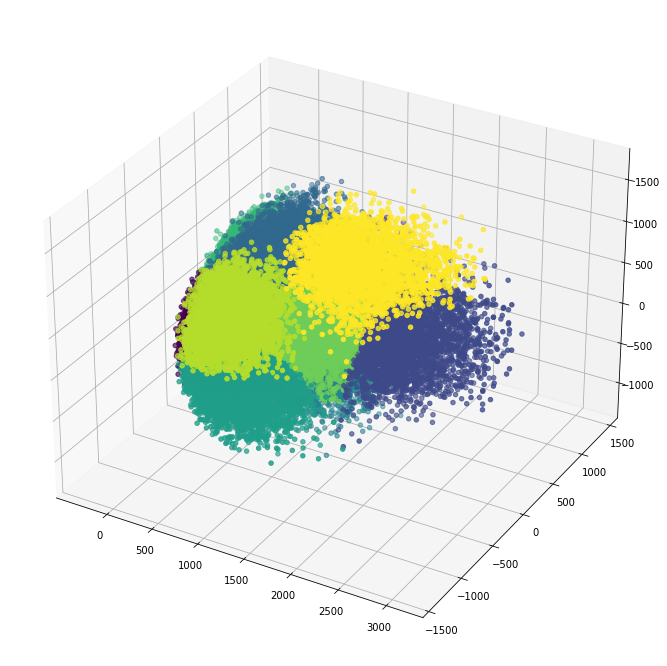

In [15]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
ax = ax.scatter3D(x, y, z, c=y_pred)
plt.show()

### PCA with random 3 eigen values

In [16]:
class PCA_Random:

    def __init__(self, n_components):
        self.n_components = n_components


    def fit(self, X_std):

        # Standardize data (not needed since data is already standardized)
        # X_mean = np.mean(X, axis = 0)
        # X_sc = np.std(X, axis = 0)
        # X_std = (X - X_mean) / X_sc

        # Eigendecomposition of covariance matrix  
        cov_mat = np.cov(X_std, rowvar=False)
        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
        eigen_vectors = eigen_vectors.T
       
        eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[i,:]) for i in range(len(eigen_values))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)
        eigen_values_sorted = np.array([x[0] for x in eigen_pairs])
        eigen_vectors_sorted = np.array([x[1] for x in eigen_pairs])

        random_vectors = []
    
        for i in range(3):
            random_vectors.append(random.randint(1,20))
    
        self.components = eigen_vectors_sorted[random_vectors,:]

        return self

    
    def transform(self, X_std):
        X_pca = X_std.dot(self.components.T)
        return X_pca

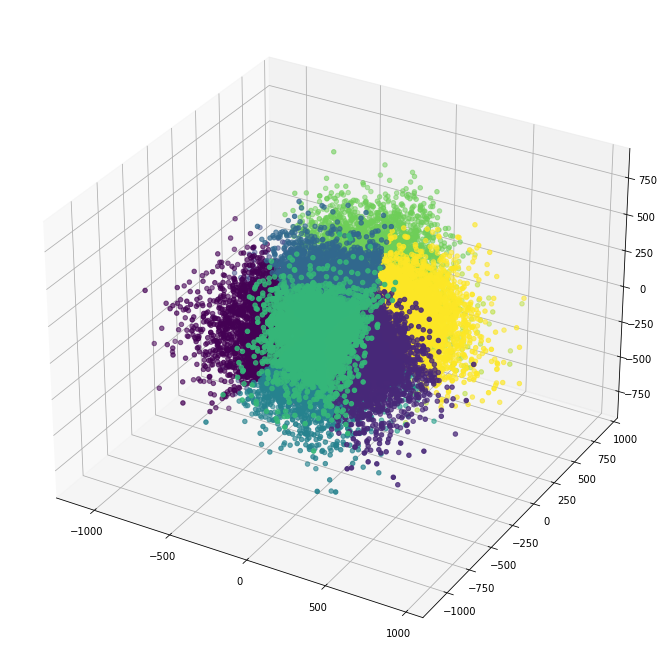

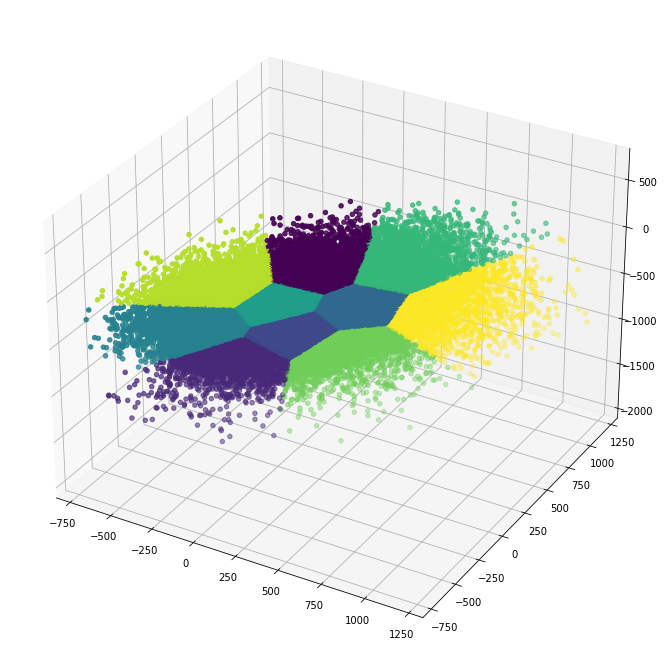

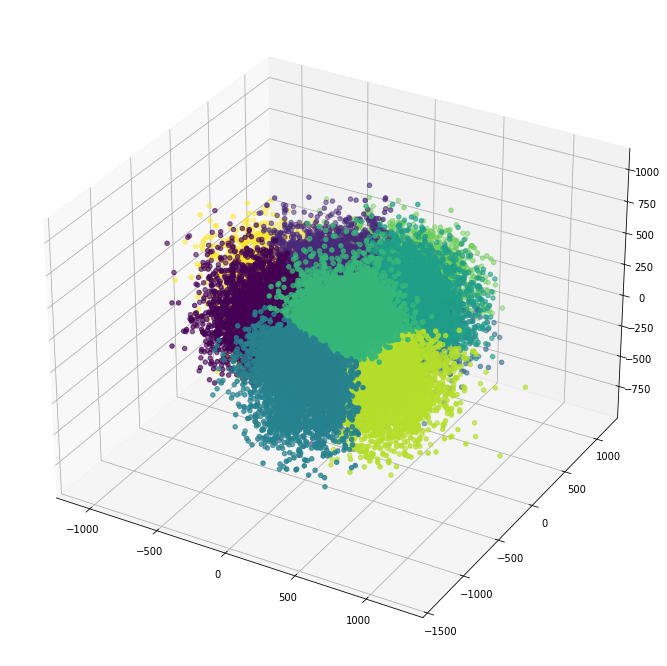

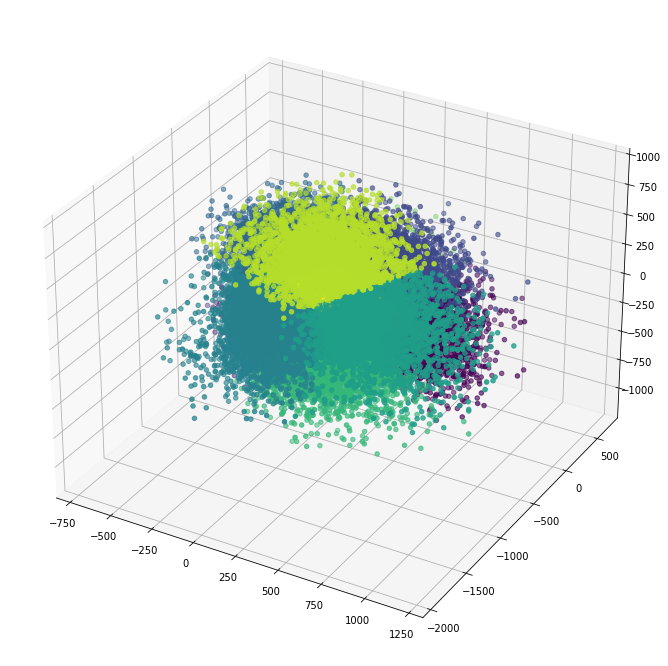

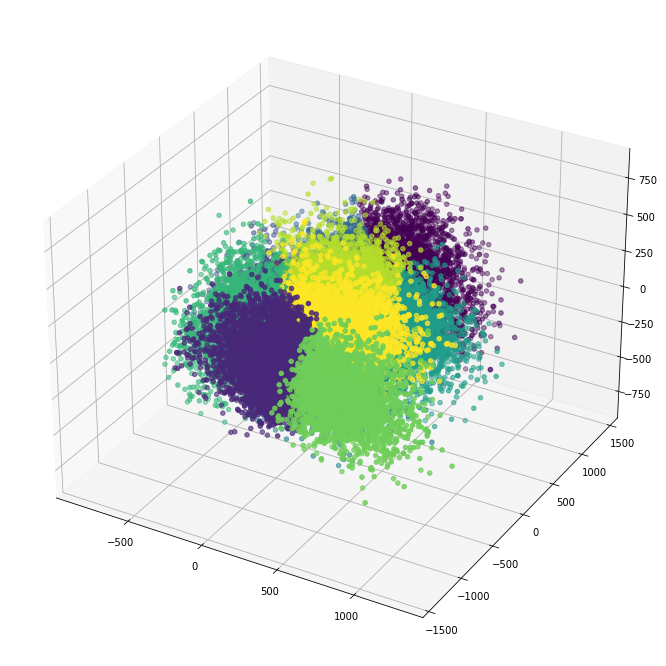

In [17]:
for i in range(0,5):

    pca = PCA_Random(n_components=3).fit(X_train)
    X_train_pca = pca.transform(X_train)

    km = KMeans(n_clusters=10, random_state=0).fit(X_train_pca)
    y_pred = km.predict(X_train_pca)

    x = X_train_pca[0]
    y = X_train_pca[1]
    z = X_train_pca[2]

    plt.figure(figsize=(15,12))
    ax = plt.axes(projection='3d')
    ax = ax.scatter3D(x, y, z, c=y_pred)
    plt.show()